In [1]:
!pip install faker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.6 MB/s eta 0:00:00


In [2]:
from faker import Faker
import pandas as pd
import numpy as np

# Initialize the Faker library
fake = Faker()

# Define the number of rows in the dataset
num_rows = 10000

# Generate the 'Vehicle Type' column
vehicle_type = np.random.choice([1, 2, 3], size=num_rows)

# Generate the 'Remaining Charge' column
remaining_charge = np.random.uniform(20, 300, size=num_rows)

# Generate the 'Vehicle Range' column
vehicle_range = np.random.uniform(100, 300, size=num_rows)

# Generate the 'Traffic Congestion' column
traffic_congestion = np.random.choice([1, 2], size=num_rows)

# Generate the 'Distance to Next Point' column
distance_to_next_point = np.zeros(num_rows)
for i in range(num_rows):
  # If traffic is congested, the distance to the next point is lower
  if traffic_congestion[i] == 2:
      distance_to_next_point[i] = np.random.uniform(0, vehicle_range[i])
  # If traffic is free, the distance to the next point is higher
  else:
      distance_to_next_point[i] = np.random.uniform(vehicle_range[i], 2*vehicle_range[i])

# Ensure that the 'Distance to Next Point' is always less than the 'Vehicle Range'
distance_to_next_point = np.minimum(distance_to_next_point, vehicle_range)

# Create a DataFrame with the generated data
data = pd.DataFrame({
 'Vehicle Type': vehicle_type,
 'Remaining Charge': remaining_charge,
 'Vehicle Range': vehicle_range,
 'Traffic Congestion': traffic_congestion,
 'Distance to Next Point': distance_to_next_point
})

# Save the DataFrame to a CSV file
data.to_csv('synthetic_dataset.csv', index=False)


In [3]:
!pip install MultiColumnLabelEncoder

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import MultiColumnLabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn. ensemble import RandomForestRegressor
import xgboost as xgb
import pickle

In [5]:
data=pd.read_csv("/content/synthetic_dataset.csv")
data.head()

Vehicle Type  Remaining Charge  Vehicle Range  Traffic Congestion  \
0             3        142.080566     237.399434                   1   
1             3        275.299813     135.704895                   2   
2             2        245.410690     154.369083                   2   
3             3        266.102474     220.081416                   1   
4             2        128.453744     125.595932                   2   

   Distance to Next Point  
0              237.399434  
1                1.569806  
2              125.671550  
3              220.081416  
4               95.113885

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

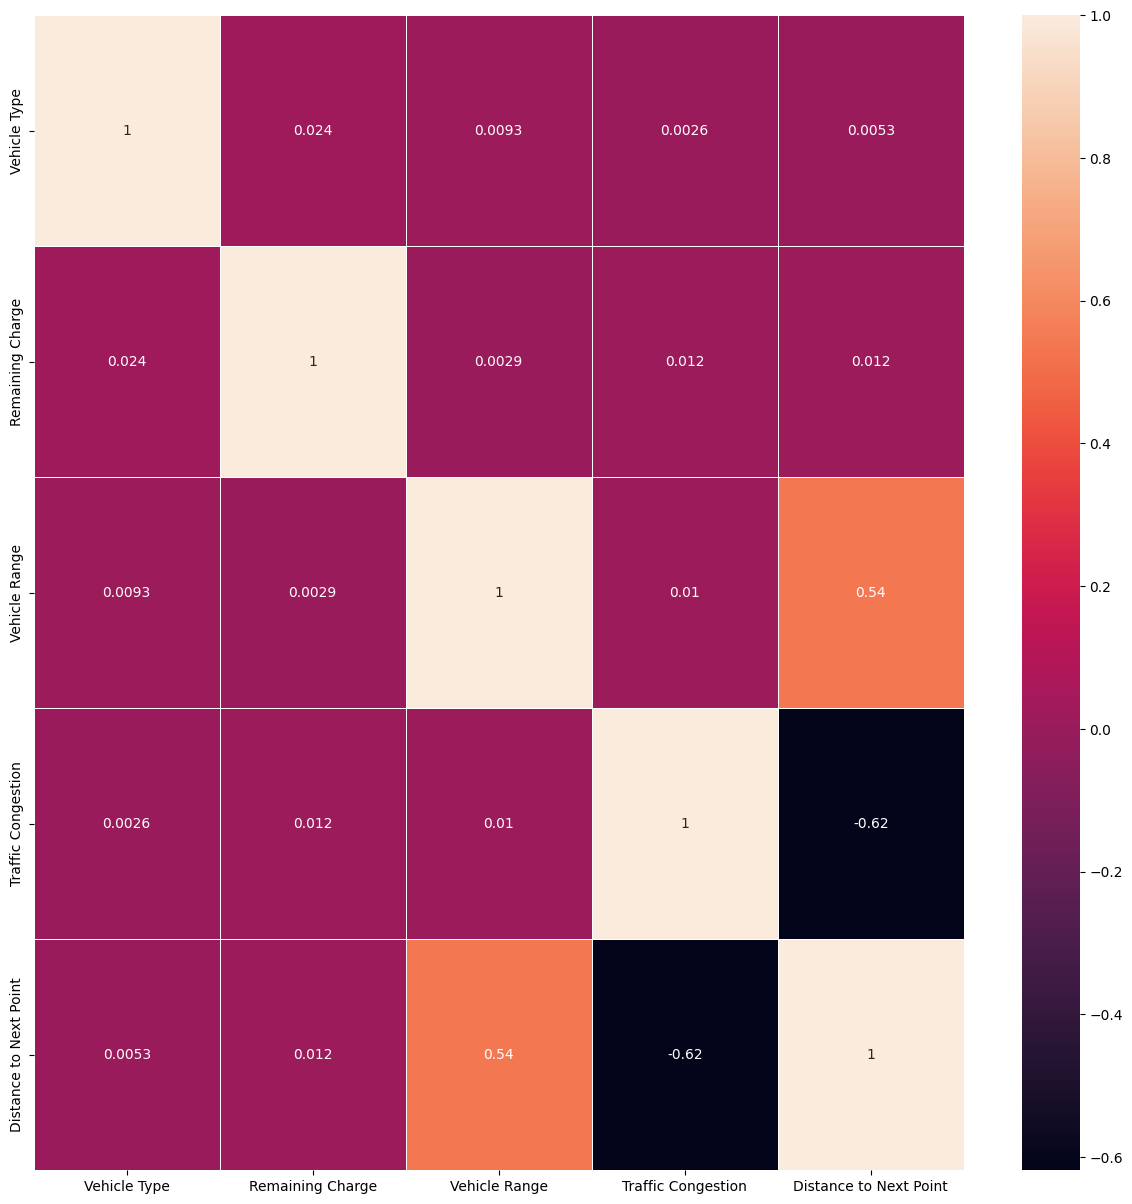

In [7]:
corrMatrix = data.corr()
fig, ax = plt.subplots(figsize=(15,15)) # sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [8]:
data.describe()

Vehicle Type  Remaining Charge  Vehicle Range  Traffic Congestion  \
count  10000.000000      10000.000000   10000.000000        10000.000000   
mean       2.002900        159.537188     199.561168            1.493200   
std        0.815082         80.771729      58.034333            0.499979   
min        1.000000         20.046318     100.012886            1.000000   
25%        1.000000         88.500764     149.044964            1.000000   
50%        2.000000        159.233787     198.269868            1.000000   
75%        3.000000        229.997725     250.335629            2.000000   
max        3.000000        299.932458     299.951757            2.000000   

       Distance to Next Point  
count            10000.000000  
mean               150.192628  
std                 79.967160  
min                  0.083239  
25%                 91.699972  
50%                148.101025  
75%                214.438275  
max                299.951757

In [9]:
data.shape

(10000, 5)

In [10]:
data.info

<bound method DataFrame.info of       Vehicle Type  Remaining Charge  Vehicle Range  Traffic Congestion  \
0                3        142.080566     237.399434                   1   
1                3        275.299813     135.704895                   2   
2                2        245.410690     154.369083                   2   
3                3        266.102474     220.081416                   1   
4                2        128.453744     125.595932                   2   
...            ...               ...            ...                 ...   
9995             2        119.390361     128.462876                   2   
9996             2         62.957068     210.677303                   2   
9997             2        280.471132     187.409347                   1   
9998             2        253.169794     245.878020                   1   
9999             2        172.826861     297.451644                   1   

      Distance to Next Point  
0                 237.399434  
1    

In [11]:
data.columns = data.columns.str.strip()
print(data.columns)

Index(['Vehicle Type', 'Remaining Charge', 'Vehicle Range',
       'Traffic Congestion', 'Distance to Next Point'],
      dtype='object')


In [12]:
x=data.drop(['Distance to Next Point'],axis=1)
y=data['Distance to Next Point']

In [13]:
X=x.to_numpy()

In [14]:
X

array([[  3.        , 142.08056646, 237.39943393,   1.        ],
       [  3.        , 275.29981295, 135.70489476,   2.        ],
       [  2.        , 245.41068954, 154.36908334,   2.        ],
       ...,
       [  2.        , 280.47113211, 187.40934672,   1.        ],
       [  2.        , 253.16979401, 245.87802027,   1.        ],
       [  2.        , 172.82686121, 297.45164362,   1.        ]])

linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into features and target variable
x = data.drop(['Distance to Next Point'],axis=1)
y = data['Distance to Next Point']

# Convert the DataFrame to a numpy array
X = x.to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=0)

# Initialize the LinearRegression model
model_lr = LinearRegression()

# Fit the model to the training data
model_lr.fit(X_train, y_train)

# Make predictions on the test data
pred_test = model_lr.predict(X_test)

# Print the evaluation metrics
print("test_MSE:", mean_squared_error(y_test, pred_test))
print("test_MAE:", mean_absolute_error(y_test, pred_test))
print("R2_score:{}".format(r2_score(y_test, pred_test)))


test_MSE: 2067.912515559059
test_MAE: 31.864246914606802
R2_score:0.6818153867268602


random forest

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the RandomForestRegressor model
model_rf = RandomForestRegressor(n_estimators=200, max_depth=5)

# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test data
pred = model_rf.predict(X_test)

# Print the evaluation metrics
print("test_MSE:", mean_squared_error(y_test, pred))
print("test_MAE:", mean_absolute_error(y_test, pred))
print("R2_score:{}".format(r2_score(y_test, pred)))


test_MSE: 1892.8635504445713
test_MAE: 26.55749572511886
R2_score:0.7087497405013761


xgboost model

In [18]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the XGBRegressor model
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)

# Fit the model to the training data
model_xgb.fit(X_train, y_train)

# Make predictions on the test data
pred3 = model_xgb.predict(X_test)

# Print the evaluation metrics
print("test_MSE:", mean_squared_error(y_test, pred3))
print("test_MAE:", mean_absolute_error(y_test, pred3))
print("R2_score:{}".format(r2_score(y_test, pred3)))


test_MSE: 2064.8715128525505
test_MAE: 27.444053969450852
R2_score:0.6822832983347511


Based on the Mean Squared Error (MSE), Mean Absolute Error (MAE), and R2 Score for the Linear Regression, Random Forest, and XGBoost models, the Random Forest model seems to perform the best.

The Random Forest model has the lowest MSE (1892.8635504445713) and MAE (26.55749572511886), and the highest R2 Score (0.7087497405013761).

These metrics indicate that the Random Forest model has the smallest average squared difference between the actual and predicted values (MSE), the smallest average absolute difference between the actual and predicted values (MAE), and the highest proportion of variance in the dependent variable that is predictable from the independent variables (R2 Score).

saving the model

In [20]:
import pickle
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)